# June 2023

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

/home/climate2/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ds23 = xr.open_dataset('ERA_2mtemp_June2023.nc')
ds23


<xarray.Dataset> Size: 82MB
Dimensions:    (longitude: 121, latitude: 117, time: 720)
Coordinates:
  * longitude  (longitude) float32 484B 68.0 68.25 68.5 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 468B 37.0 36.75 36.5 36.25 ... 8.5 8.25 8.0
  * time       (time) datetime64[ns] 6kB 2023-06-01 ... 2023-06-30T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 82MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-11 09:02:02 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [3]:
# Extract the 2m temperature data
temp = ds23['t2m']  # Adjust the variable name as per your file
time = ds23['time']
lats = ds23['latitude']
lons = ds23['longitude']


In [4]:
# Average temperature over June
june_temp = temp.sel(time=temp['time.month'] == 6).mean(dim='time')


In [5]:
june_temp=june_temp[:]-273.15

In [6]:
june_temp

<xarray.DataArray 't2m' (latitude: 117, longitude: 121)> Size: 113kB
array([[33.83084592, 34.14051247, 34.39444721, ..., 15.42072751,
        13.61047946, 12.79306553],
       [32.24895534, 32.57438233, 32.32665043, ..., 16.30781416,
        15.06981858, 14.03450453],
       [27.46621714, 29.06601047, 29.09369158, ..., 18.08212459,
        16.9190513 , 14.87610097],
       ...,
       [28.33589271, 28.35647293, 28.37023321, ..., 28.1221267 ,
        28.22529704, 28.16195258],
       [28.33082375, 28.34938374, 28.36658577, ..., 28.21370248,
        28.28159914, 28.2903239 ],
       [28.33420863, 28.35313487, 28.36708079, ..., 28.3444469 ,
        28.35413997, 28.37445094]])
Coordinates:
  * longitude  (longitude) float32 484B 68.0 68.25 68.5 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 468B 37.0 36.75 36.5 36.25 ... 8.5 8.25 8.0

In [7]:
june_temp.mean()

<xarray.DataArray 't2m' ()> Size: 8B
array(23.62720412)

In [8]:
# Define temperature ranges
temp_ranges = [-np.inf, 10, 15, 20, 25, 30, 35, np.inf]
temp_labels = ['Lowest on record', 'Very much below average', 'Below average', 
               'Average', 'Above average', 'Very much above average', 'Highest on record']


In [9]:
# Classify the temperature data
classified_temp = np.digitize(june_temp, temp_ranges)


/tmp/ipykernel_48536/1327500296.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(temp_labels))


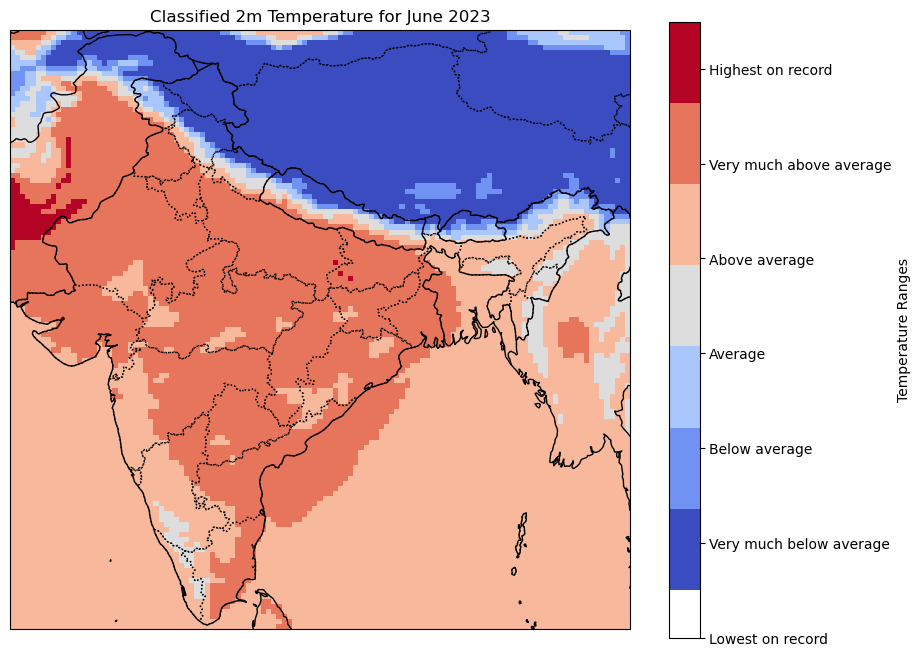

In [9]:
# Create a plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the classified temperature data
cmap = plt.cm.get_cmap('coolwarm', len(temp_labels))
mesh = ax.pcolormesh(lons, lats, classified_temp, cmap=cmap, shading='auto')

# Add color bar
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_ticks(np.arange(0.5, len(temp_labels) + 0.5))
cbar.set_ticklabels(temp_labels)
cbar.set_label('Temperature Ranges')

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')

# Add title
plt.title('Classified 2m Temperature for June 2023')
plt.savefig('June2023.png')

plt.show()



# June 2024

In [10]:
ds24 = xr.open_dataset('ERA_2mtemp_June2024.nc')
ds24

<xarray.Dataset> Size: 82MB
Dimensions:    (longitude: 121, latitude: 117, time: 720)
Coordinates:
  * longitude  (longitude) float32 484B 68.0 68.25 68.5 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 468B 37.0 36.75 36.5 36.25 ... 8.5 8.25 8.0
  * time       (time) datetime64[ns] 6kB 2024-06-01 ... 2024-06-30T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 82MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-11 08:55:44 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [11]:
# Extract the 2m temperature data
temp = ds24['t2m']  # Adjust the variable name as per your file
time = ds24['time']
lats = ds24['latitude']
lons = ds24['longitude']


In [12]:
# Average temperature over June
june_temp = temp.sel(time=temp['time.month'] == 6).mean(dim='time')


In [13]:
june_temp=june_temp[:]-273.15

In [14]:
june_temp.mean()

<xarray.DataArray 't2m' ()> Size: 8B
array(24.09524837)

In [14]:
# Define temperature ranges
temp_ranges = [-np.inf, 10, 15, 20, 25, 30, 35, np.inf]
temp_labels = ['Lowest on record', 'Very much below average', 'Below average', 
               'Average', 'Above average', 'Very much above average', 'Highest on record']


In [15]:
# Classify the temperature data
classified_temp = np.digitize(june_temp, temp_ranges)


/tmp/ipykernel_48536/3249576007.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(temp_labels))


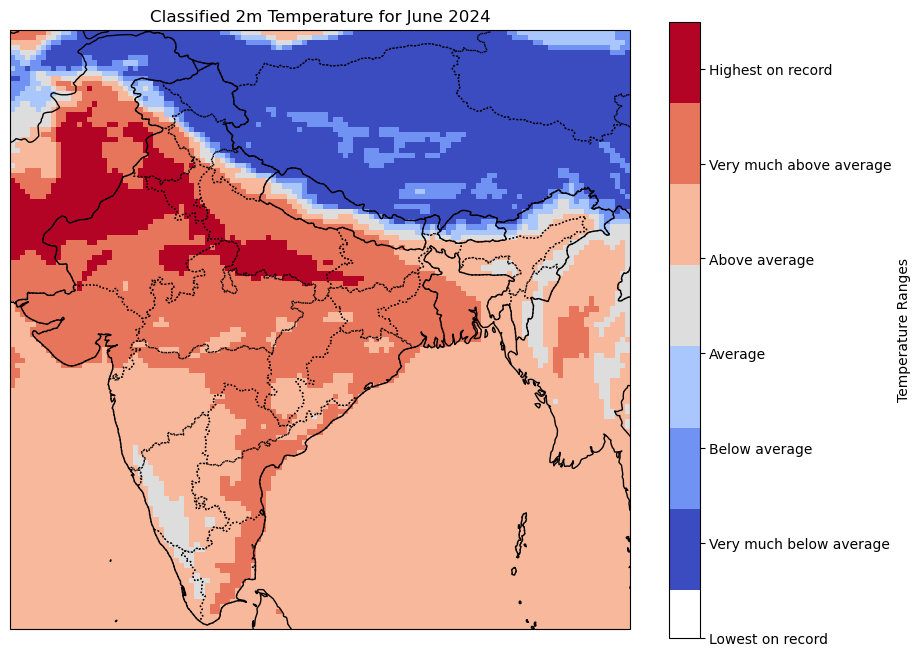

In [16]:
# Create a plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the classified temperature data
cmap = plt.cm.get_cmap('coolwarm', len(temp_labels))
mesh = ax.pcolormesh(lons, lats, classified_temp, cmap=cmap, shading='auto')

# Add color bar
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_ticks(np.arange(0.5, len(temp_labels) + 0.5))
cbar.set_ticklabels(temp_labels)
cbar.set_label('Temperature Ranges')

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES, linestyle=':')

# Add title
plt.title('Classified 2m Temperature for June 2024')
plt.savefig('June2024.png',dpi=800)

plt.show()

